In [2]:
from redd_parameters import *
import redd_parameters
import pandas as pd
import matplotlib.pyplot as plt
import time
import argparse
import os
import pdb
import json


In [3]:
parser = argparse.ArgumentParser(description='sequence to point learning \
                                     example for NILM')
parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")

args = parser.parse_args()

In [4]:

DATA_DIRECTORY = '../../../rawdata/REDD'
SAVE_PATH = '../../../trainingdata/redd_kettle'
AGG_MEAN = 522
AGG_STD = 814
def get_arguments():
    parser = argparse.ArgumentParser(description='sequence to point learning \
                                     example for NILM')
    parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
    parser.add_argument('--data_dir', type=str, default=DATA_DIRECTORY,
                          help='The directory containing the REDD data')
    parser.add_argument('--appliance_name', type=str, default='microwave',
                          help='which appliance you want to train: kettle,\
                          microwave,fridge,dishwasher,washingmachine')
    parser.add_argument('--aggregate_mean',type=int,default=AGG_MEAN,
                        help='Mean value of aggregated reading (mains)')
    parser.add_argument('--aggregate_std',type=int,default=AGG_STD,
                        help='Std value of aggregated reading (mains)')
    parser.add_argument('--save_path', type=str, default=SAVE_PATH,
                          help='The directory to store the training data')
    return parser.parse_args()


In [5]:
start_time = time.time()
args  = get_arguments()
appliance_name = args.appliance_name
appliance_name


'microwave'

In [6]:
params_appliance

{'microwave': {'windowlength': 599,
  'on_power_threshold': 200,
  'max_on_power': 3969,
  'mean': 500,
  'std': 800,
  's2s_length': 128,
  'houses': [1, 2, 3],
  'channels': [11, 6, 16],
  'train_build': [2, 3],
  'test_build': 1},
 'fridge': {'windowlength': 599,
  'on_power_threshold': 50,
  'max_on_power': 3323,
  'mean': 200,
  'std': 400,
  's2s_length': 512,
  'houses': [1, 2, 3],
  'channels': [5, 9, 7],
  'train_build': [2, 3],
  'test_build': 1},
 'dishwasher': {'windowlength': 599,
  'on_power_threshold': 10,
  'max_on_power': 3964,
  'mean': 700,
  'std': 1000,
  's2s_length': 1536,
  'houses': [1, 2, 3],
  'channels': [6, 10, 9],
  'train_build': [2, 3],
  'test_build': 1},
 'washingmachine': {'windowlength': 599,
  'on_power_threshold': 20,
  'max_on_power': 3999,
  'mean': 400,
  'std': 700,
  's2s_length': 2000,
  'houses': [1, 2, 3],
  'channels': [20, 7, 13],
  'train_build': [2, 3],
  'test_build': 1}}

In [7]:
sample_seconds = 8
validation_percent = 10
nrows = None
debug = True

appliance_name = args.appliance_name
print('\n' + appliance_name)
train = pd.DataFrame(columns=['aggregate', appliance_name])
params_appliance = redd_parameters.params_appliance

#the code until appending all df_aligns to train if houses in training_houses and creating a test csv if houses in test set
#should be inside the for loop.
#I am taking it outside the for loop for sake of understanding the data and plotting
for h in params_appliance[appliance_name]['houses']:
    print('    ' + args.data_dir + 'house_' + str(h) + '/'
                + 'channel_' +
                str(params_appliance[appliance_name]['channels'][params_appliance[appliance_name]['houses'].index(h)]) +
                '.dat')

        # read data
    mains1_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                      str(1) + '.dat',
                                      sep="\s+",
                                      nrows=nrows,
                                      usecols=[0, 1],
                                      names=['time', 'mains1'],
                                      dtype={'time': str},
                                      )

    mains2_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                      str(2) + '.dat',
                                      sep="\s+",
                                      nrows=nrows,
                                      usecols=[0, 1],
                                      names=['time', 'mains2'],
                                      dtype={'time': str},
                                      )
    app_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                   str(params_appliance[appliance_name]['channels']
                                       [params_appliance[appliance_name]['houses'].index(h)]) + '.dat',
                                   sep="\s+",
                                   nrows=nrows,
                                   usecols=[0, 1],
                                   names=['time', appliance_name],
                                   dtype={'time': str},
                                   )


microwave
    ../../../rawdata/REDDhouse_1/channel_11.dat


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: read_table is deprecated, use read_csv instead.
/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: read_table is deprecated, use read_csv instead.
/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: read_table is deprecated, use read_csv instead.


    ../../../rawdata/REDDhouse_2/channel_6.dat
    ../../../rawdata/REDDhouse_3/channel_16.dat


In [8]:
mains1_df['time'] = pd.to_datetime(mains1_df['time'], unit='s')
mains2_df['time'] = pd.to_datetime(mains2_df['time'], unit='s')

mains1_df.set_index('time', inplace=True)
mains2_df.set_index('time', inplace=True)

mains_df = mains1_df.join(mains2_df, how='outer')

mains_df['aggregate'] = mains_df.iloc[:].sum(axis=1)   #aggregate of 2 mains channels
        #resample = mains_df.resample(str(sample_seconds) + 'S').mean()

mains_df.reset_index(inplace=True)

In [9]:
del mains_df['mains1'], mains_df['mains2']

    mains_df:
                 time  aggregate
0 2011-04-16 05:11:27     757.09
1 2011-04-16 05:11:28     758.89
2 2011-04-16 05:11:29     758.89
3 2011-04-16 05:11:30     758.64
4 2011-04-16 05:11:31     756.64


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


app_df:
                 time  microwave
0 2011-04-16 05:11:30        2.0
1 2011-04-16 05:11:33        2.0
2 2011-04-16 05:11:36        2.0
3 2011-04-16 05:11:40        2.0
4 2011-04-16 05:11:43        2.0


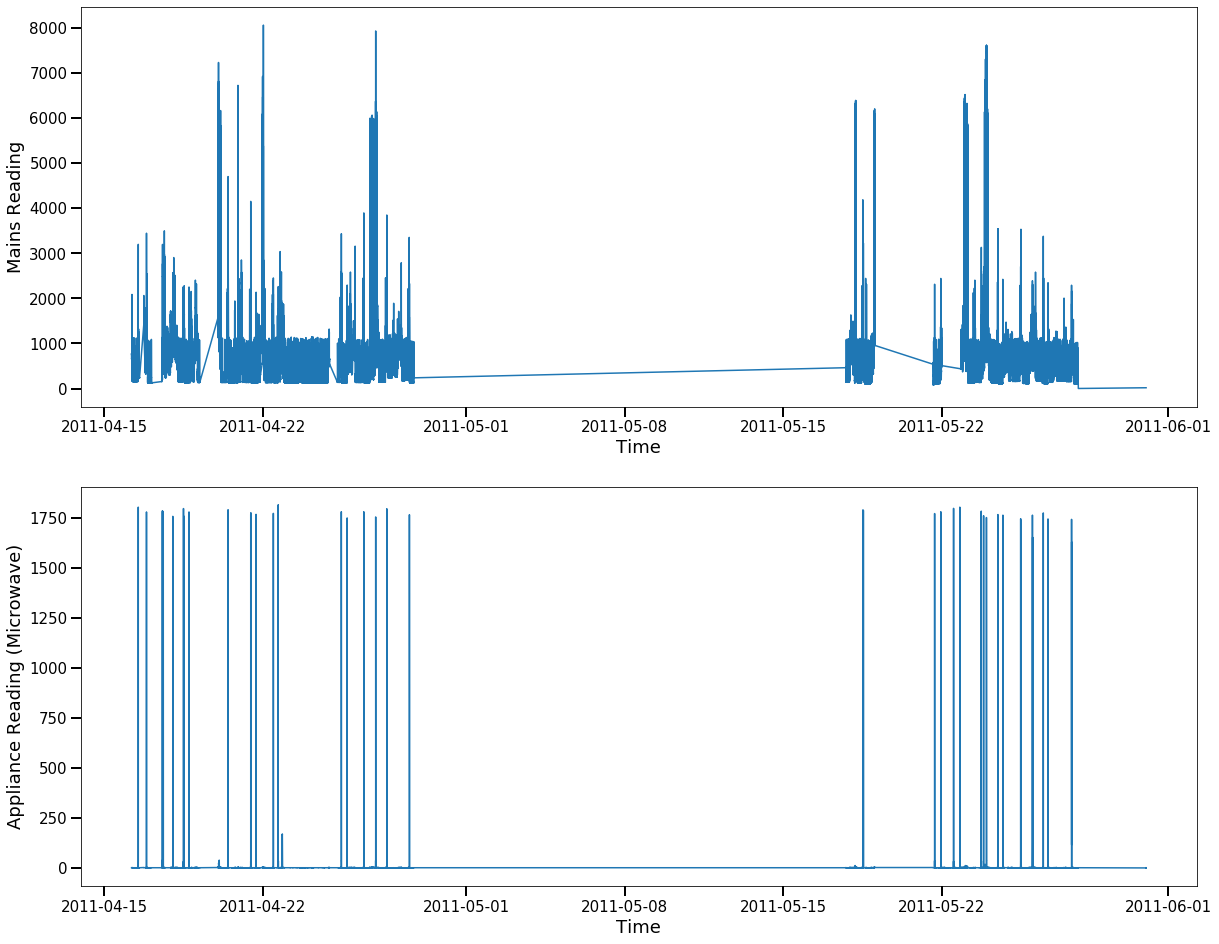

In [10]:

if debug:
    print("    mains_df:")
    print(mains_df.head())
    fig = plt.figure(figsize = [20,25])
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(mains_df['time'], mains_df['aggregate'])
    ax1.tick_params(direction='out', length=10, width=2, labelsize = 15)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Mains Reading", fontsize=18)

app_df['time'] = pd.to_datetime(app_df['time'], unit='s')
            # app_df.columns = [appliance_name]
if debug:
    print("app_df:")
    print(app_df.head())
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(app_df['time'], app_df[appliance_name])
    ax2.tick_params(length=10, width=2, labelsize = 15)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Appliance Reading (Microwave)", fontsize=18)
    
    
plt.show()

In [11]:
mains_df.set_index('time', inplace=True)
app_df.set_index('time', inplace=True)

In [12]:
print(mains_df.count())   
print("Nans in mains readings: {}".format(pd.isna(mains_df['aggregate']).sum()))
mains_df.head() 
mains_df.tail()

aggregate    1427284
dtype: int64
Nans in mains readings: 0


,aggregate
time,
2011-05-31 00:19:45,17.66
2011-05-31 00:19:48,17.67
2011-05-31 00:19:49,17.67
2011-05-31 00:19:52,17.70
2011-05-31 00:19:54,17.69


**Mains_df has readings every second**
<br> No Nans
<br> Start Time: 2011-04-16 05:11:27 (for house 3)
<br> End Time: 2011-05-31 00:19:54 (for house 3)
<br> Total Number of readings: 1427284


In [13]:
print(app_df.count())  #dishwasher
print("Nans in apps readings: {}".format(pd.isna(app_df[appliance_name]).sum()))
app_df.head(20)
app_df.tail()




microwave    404107
dtype: int64
Nans in apps readings: 0


,microwave
time,
2011-05-31 00:19:23,1.0
2011-05-31 00:19:26,2.0
2011-05-31 00:19:30,2.0
2011-05-31 00:19:33,2.0
2011-05-31 00:19:36,2.0


**app_df has readings every 3 or 4 seconds, there are readings more spaced than 4 seconds**
<br>No Nans
<br>Start Time: 2011-04-16 05:11:30	 (for house 3)
<br>End Time: 2011-05-31 00:19:36 (for house 3)
<br>Total Number of readings: 404107

In [14]:
mains_df.join(app_df, how='outer'). \
                resample(str(sample_seconds) + 'S').mean().fillna(method='backfill', limit=1).isna().sum()

aggregate    299776
microwave    291346
dtype: int64

time         183543
aggregate    183543
microwave    183543
dtype: int64


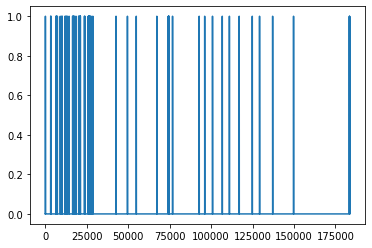

In [15]:
df_align = mains_df.join(app_df, how='outer'). \
                resample(str(sample_seconds) + 'S').mean().fillna(method='backfill', limit=1)   #sample_seconds = 8 sec
df_align = df_align.dropna()
df_align.reset_index(inplace=True)
print(df_align.count())
df_align['OVER 5 MINS'] = (df_align['time'].diff()).dt.seconds > 9   #to check how many readings are more than 9 seconds apart
plt.plot(df_align['OVER 5 MINS'])
plt.show() 

In [16]:
df_align[df_align["OVER 5 MINS"] == True].count()

time           285
aggregate      285
microwave      285
OVER 5 MINS    285
dtype: int64

In [17]:
print(df_align.count())  #merged mains and app
print("Nans in merged and resampled readings (just a check, nans already backfilled and removed): {}".format(pd.isna(df_align).sum()))
df_align.head()
df_align.tail()

time           183543
aggregate      183543
microwave      183543
OVER 5 MINS    183543
dtype: int64
Nans in merged and resampled readings (just a check, nans already backfilled and removed): time           0
aggregate      0
microwave      0
OVER 5 MINS    0
dtype: int64


,time,aggregate,microwave,OVER 5 MINS
183538,2011-05-31 00:19:04,17.71500,1.500000,False
183539,2011-05-31 00:19:12,17.72625,1.500000,False
183540,2011-05-31 00:19:20,17.70750,1.666667,False
183541,2011-05-31 00:19:28,17.66250,2.000000,False
183542,2011-05-31 00:19:36,17.67625,2.000000,False


**df_align is a merged df of mains and app, resampled to 1 reading in 8 seconds, missing values filled by backfilling.**
<br> missing values: not all timesteps in the appliance timeseries (may be in mains df too) are not spaced <= 8 seconds. Therefore resampling to 8 sec creates some missing values
<br> these missing values are filled by backfilling
<br> but wherever the time gap is more 16 seconds,i.e., more than 2 consecutive Nans, backfilling doesn't remove all the NaNs. Backfilling is only to interpolate the missing values caused due to different timestamps of mains and appliance
<br> Nan readings after backfilling: 299776 (27.7 days),
<br> these rows with NaNs (because of the occurence of higher time gaps between timestamps) are droped using dropna method 
<br> Total Number of readings after dropna: 183543
<br> Start time: 2011-04-16 05:11:20	
End time: 2011-05-31 00:19:36
<br> Although start and end dates and 45 days apart. The dataset has data only during the dates in set(all_dates): 26 days
<br> Since the data recorded during these dates is also not at regular intervals, 
<br> it's actually only around 17 days worth of data.

In [18]:

df_align["time"].dt.day.unique()  #looks like it has data only in these dates in April and May

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31])

In [19]:
all_dates = []
for i in range(len(df_align)):
    all_dates.append((df_align.iloc[i]["time"].month, df_align.iloc[i]["time"].day))
set(all_dates)

{(4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (4, 21),
 (4, 22),
 (4, 23),
 (4, 24),
 (4, 25),
 (4, 26),
 (4, 27),
 (4, 28),
 (5, 17),
 (5, 18),
 (5, 19),
 (5, 21),
 (5, 22),
 (5, 23),
 (5, 24),
 (5, 25),
 (5, 26),
 (5, 27),
 (5, 28),
 (5, 30),
 (5, 31)}

In [20]:
183543*8/60/60/24  #It's only around 17 days worth of data.  

16.994722222222222

In [21]:
299776*8/60/60/24  #after resampling and backfilling (before removing nans)

27.757037037037037

df_align:
                 time  aggregate  microwave  OVER 5 MINS
0 2011-04-16 05:11:20  757.09000        2.0        False
1 2011-04-16 05:11:28  758.67625        2.0        False
2 2011-04-16 05:11:36  758.00375        2.0        False
3 2011-04-16 05:11:44  759.10750        2.0        False
4 2011-04-16 05:11:52  760.28875        2.0        False


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


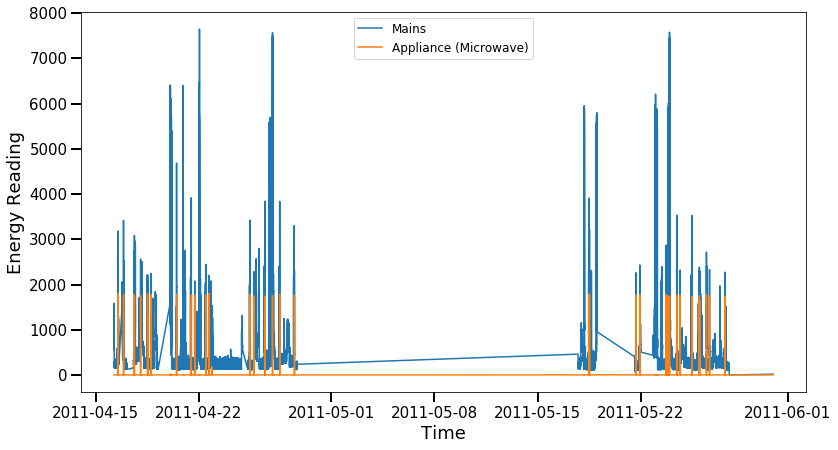

In [22]:
mains = df_align['aggregate'].values
app_data = df_align[appliance_name].values
# plt.plot(np.arange(0, len(mains)), mains, app_data)
# plt.show()
if debug:
# plot the dtaset
    print("df_align:")
    print(df_align.head())
    fig2 = plt.figure(figsize = [13,7])
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(df_align['time'], df_align['aggregate'])
    ax2.plot(df_align['time'], df_align[appliance_name])
    ax2.tick_params(direction='out', length=10, width=2, labelsize = 15)
    ax2.legend(["Mains", "Appliance (Microwave)"], fontsize = "large")
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Energy Reading", fontsize=18)
    #plt.plot(df_align['aggregate'].values)
    #plt.plot(df_align[appliance_name].values)  #make the plot time (date) vs readings
    plt.show()

**Normalization** 

In [24]:
# Normalization
mean = params_appliance[appliance_name]['mean']
std = params_appliance[appliance_name]['std']

df_align['aggregate'] = (df_align['aggregate'] - args.aggregate_mean) / args.aggregate_std
df_align[appliance_name] = (df_align[appliance_name] - mean) / std

In [25]:
df_align.head()

,time,aggregate,microwave,OVER 5 MINS
0,2011-04-16 05:11:20,-0.640923,-0.625778,False
1,2011-04-16 05:11:28,-0.640920,-0.625778,False
2,2011-04-16 05:11:36,-0.640921,-0.625778,False
3,2011-04-16 05:11:44,-0.640920,-0.625778,False
4,2011-04-16 05:11:52,-0.640918,-0.625778,False


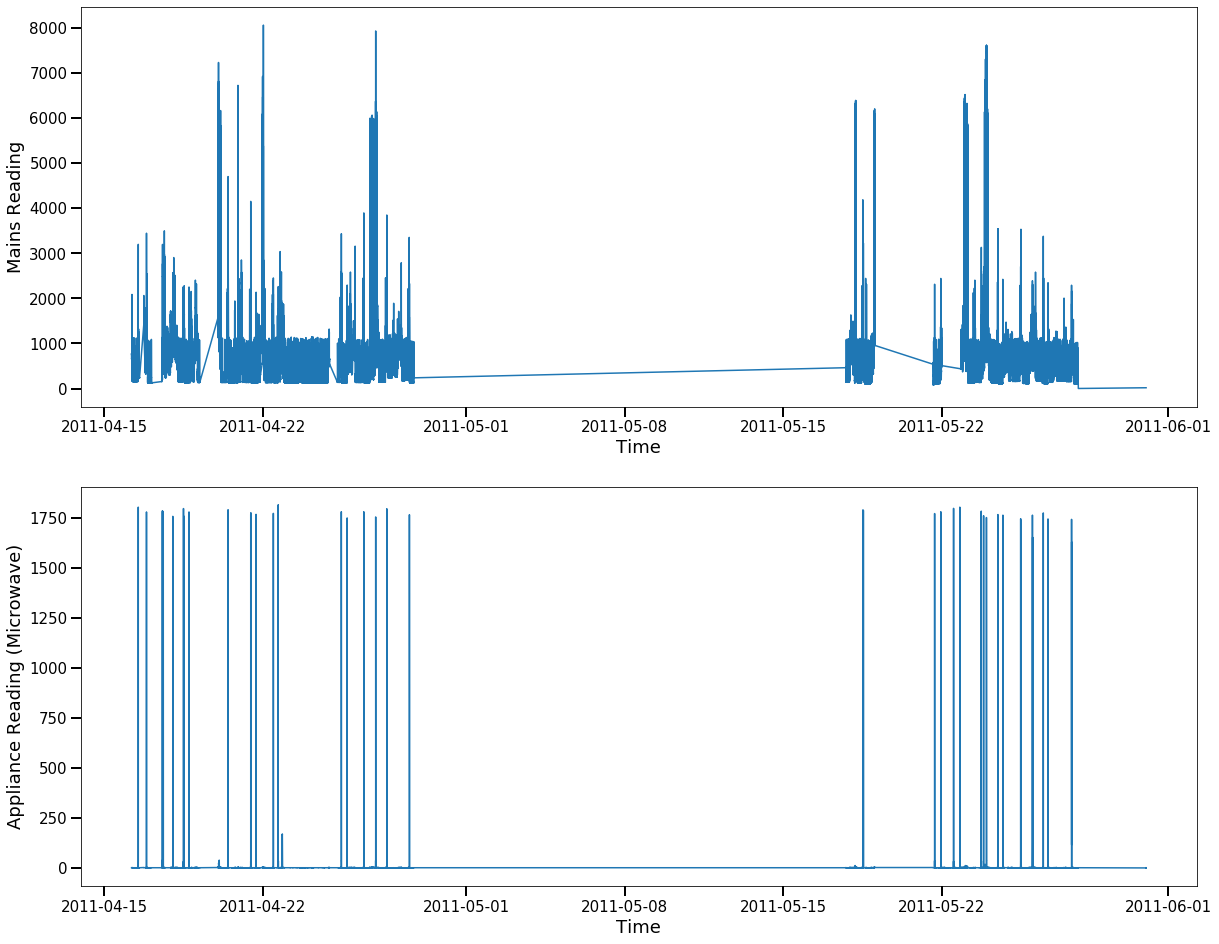

In [27]:
fig